In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np

#import warnings
#warnings.filterwarnings('ignore')

2023-07-10 23:48:56.407104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 23:48:56.978188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
x_numpy = np.load("images_x_data.npz")['arr_0']
y_label = np.load("images_y_data.npz")['arr_0']
y = (y_label==True).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x_numpy,y,random_state=True,test_size=0.2,stratify=y)
x_numpy,y_label = None, None

In [3]:
## optimizer
rms='rmsprop'
adam='adam'

## loss
SPC = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
CC = tf.keras.losses.CategoricalCrossentropy()
BC = 'binary_crossentropy'
MSE = 'mse'
#optimizer = tf.keras.optimizers.Adam(learning_rate=1)

## last layer
softmax = 'softmax'
sigmoid = 'sigmoid'

In [6]:
input_shape=(360, 360, 1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=input_shape))
model.add(tf.keras.layers.AveragePooling2D())
#model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, (2,2)))
model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.Conv2D(8, (2,2)))
model.add(tf.keras.layers.MaxPooling2D())
#####
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#model.compile(loss=MSE, optimizer=rms, metrics=['accuracy'])
model.compile(loss=BC, optimizer=adam, metrics=['accuracy'])

In [7]:
model.count_params()
#model.summary()

29961

---

In [11]:
model.fit(x_train,y_train, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1229 - accuracy: 0.9536
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1110 - accuracy: 0.9589
Epoch 3/10
800/800 [==============================] - 3s 3ms/step - loss: 0.1092 - accuracy: 0.9586
Epoch 4/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0908 - accuracy: 0.9669
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0870 - accuracy: 0.9684
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0835 - accuracy: 0.9717
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0655 - accuracy: 0.9794
Epoch 8/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0624 - accuracy: 0.9780
Epoch 9/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0579 - accuracy: 0.9817
Epoch 10/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0562 - accuracy: 0.9816

In [12]:
y_prob = model.predict(x_test)
print(y_prob.max())

50/50 [==============================] - 0s 4ms/step
0.94837046


In [13]:
y_pred = list(map(lambda x: x>0.5,y_prob))

import pandas as pd
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1280
           1       0.85      0.77      0.81       320

    accuracy                           0.93      1600
   macro avg       0.90      0.87      0.88      1600
weighted avg       0.93      0.93      0.93      1600

[[1238   42]
 [  74  246]]


In [14]:
model.save_weights('models/R3convlayer')

In [10]:
y_pred = list(map(lambda x: x>0.5,y_prob))

import pandas as pd
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1280
           1       0.85      0.79      0.82       320

    accuracy                           0.93      1600
   macro avg       0.90      0.88      0.89      1600
weighted avg       0.93      0.93      0.93      1600

[[1234   46]
 [  68  252]]


In [23]:
#x_train, y_train = None,None

---

In [24]:
x_valid = np.load("x_test_data_random_y.npz")['arr_0']
y_valid = np.load("y_test_data_random_y.npz")['arr_0']
y = (y_valid==True).astype(int)

In [25]:
y_prob = model.predict(x_valid)
print(y_prob.max())
y_pred = list(map(lambda x: x>0.5,y_prob))

79/79 [==============================] - 0s 5ms/step
0.99989355


In [26]:
print(classification_report(y_valid,y_pred))
cm = confusion_matrix(y_valid,y_pred)
print(cm)
x_valid,y_valid = None,None

              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2000
        True       0.79      0.69      0.73       500

    accuracy                           0.90      2500
   macro avg       0.86      0.82      0.84      2500
weighted avg       0.90      0.90      0.90      2500

[[1908   92]
 [ 157  343]]


In [16]:
#model.save_weights('models/RACMCA2')

In [ ]:
y_pred = list(map(lambda x: x>0.5,y_prob))

import pandas as pd
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
col = ['N','Y']
print(pd.DataFrame(cm,index=col,columns = col))

In [ ]:
y_test[0:5]

In [ ]:
y_pred[:5]

1


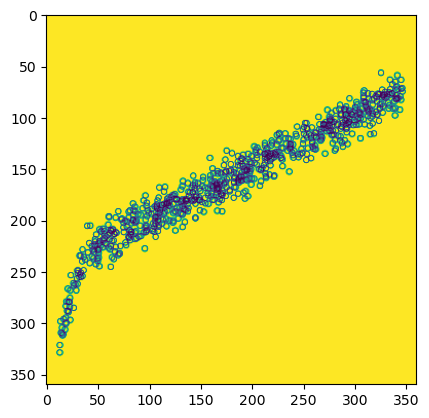

In [9]:
print(y_train[4])
_ = plt.imshow(x_train[4])

1


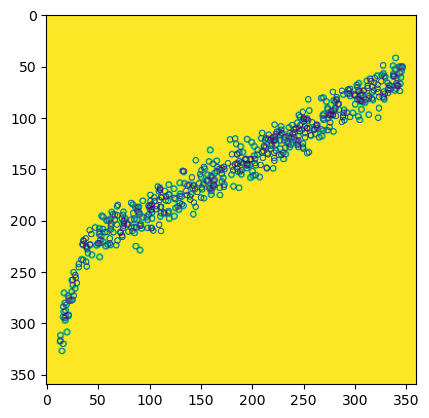

In [10]:
print(y_train[0])
_ = plt.imshow(x_train[0])

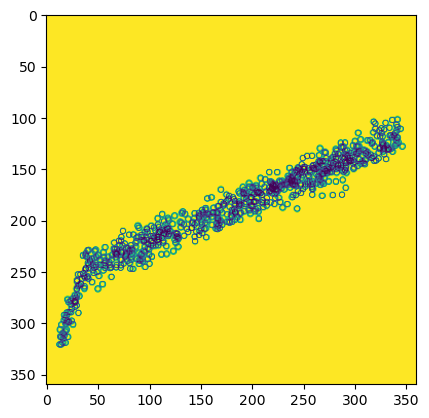

In [11]:
plt.imshow(x_test[0])

In [ ]:
plt.imshow(x_test[1])

In [ ]:
plt.imshow(x_test[2])

In [ ]:
plt.imshow(x_test[3])

In [ ]:
plt.imshow(x_test[4])